# Stochastic Gradient Descent

Our goal is to discuss SGD which is an variation of GD. SGD has been widely used in data science problems. The structure of this lecture:

1. GD on simple linear regression and the drawbacks to GD
2. SGD and its code


In [5]:
# import packages
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
import time

## Revisit simple linear regression

Given data points $(x^i,y^i)$, where i represents i-th data, we want to find a straight line to fit those data points. In other words, we want to find slope $k$ and intercept $b$, then we can construct straight line $$y=kx+b$$.


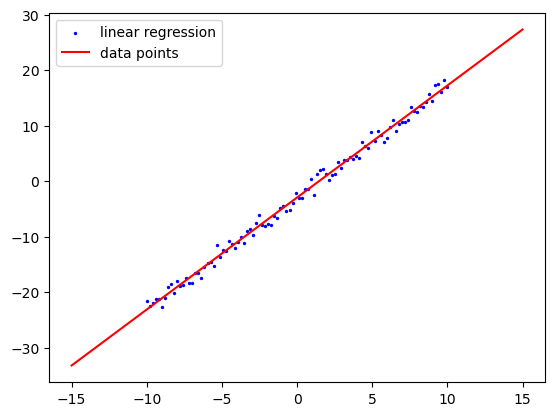

In [2]:
# linear regression using sklearn

# generate data points
m = 100
x = np.linspace(-10, 10, m)
y = 2*x - 3 + np.random.randn(m)    # the last term represents random noise

# construct linear regression model using sklearn
reg = LinearRegression().fit(x.reshape(m, 1), y)

# slope
k = reg.coef_
b = reg.intercept_

# visualization
plt.scatter(x, y, color = 'b', s = 2)      # data points
# plot model (straight line)
xx = np.linspace(-15, 15, 100)
yy = k[0]*xx + b
plt.plot(xx, yy, 'r-')
plt.legend(['linear regression','data points'])



hold on! Do you know what happened when we call fit command? Or in other words, how do we find slope $k$ and intercept $b$? Also, can we generalize to linear regression?

#### Mathematics:
Since we assume that the model is $y=kx+b$, then for each input $x^i$, we can compute $kx^i+b$. We want to make the difference between $kx^i+b$ and observed output $y^i$ as small as possible.

We try to minimize the following function over $k$ and $b$:

$$\mathop{\mathbf{minimize}}_{k,b} f(k,b) = \frac{1}{m}\sum_{i=1}^{m} (y^i - kx^i - b)^2 $$


To use GD, we need to find the objective function's gradient (in class).

In [3]:
m = int(1e5)
x = np.linspace(-10, 10, m)
y = 2*x - 3 + np.random.randn(m)    # the last term represents random noise

# initial value 
k, b = 1, -2

# step size
eta = 0.01

# number of iterations
n_iter = 400

# GD

start = time.time()

for t in range(n_iter + 1):

    # compute the gradient
    grad_k = sum(2 * (k*x + b - y) * x) / m
    
    grad_b = sum(2 * (k*x + b - y)) / m
    
    # updating rule
    k = k - eta*grad_k
    
    b = b - eta*grad_b

    # compute the loss
    L = sum((k*x + b - y)**2) / m

    # print outputs

    if t % 50 == 0:
        print(f"Step {t}".ljust(10), end = " ")
        print(f"L = {L:.2f}".ljust(12), end = " ")
        print(f"k = {k:.3f}".ljust(15), end = " ")
        print(f"b = {b:.4f}".ljust(15), end = " ")
        print(" ")

stop = time.time()

print(f"Computational time is {stop - start} seconds.")

Step 0     L = 5.67     k = 1.667       b = -2.0200      
Step 50    L = 1.13     k = 2.000       b = -2.6421      
Step 100   L = 1.02     k = 2.000       b = -2.8687      
Step 150   L = 1.01     k = 2.000       b = -2.9512      
Step 200   L = 1.01     k = 2.000       b = -2.9813      
Step 250   L = 1.00     k = 2.000       b = -2.9922      
Step 300   L = 1.00     k = 2.000       b = -2.9962      
Step 350   L = 1.00     k = 2.000       b = -2.9977      
Step 400   L = 1.00     k = 2.000       b = -2.9982      
Computational time is 13.859536170959473 seconds.


## Claim: GD is slow.

Notice that this is a simple machine learning example in the sense that 1) number of training data is small, 2) model is simple because there are only 2 parameters, and 3) data is 1D.

## Reason:

The gradient sums over $m$ terms. It is computationally expensive to compute gradient when $m$ is large (number of observations).

## Solution: stochastic gradient descent

Instead of using $m$ data points, we select $b$ data points and do gradient descent using selected data points ($b < m$). 

Those data points are randomly selected, this is where the word 'stochastic' comes from. 

Terminology:
- batch size: how many data points are selected to run GD ($b$ above).

Some remarks:
1. In machine learning task, gradient is a summation over $m$ terms.
2. Number of observations $m$ is huge (big data)
3. Many ways to do SGD, we only introduce the most common one.



A nice explanation on SGD with batch size 1: https://nbviewer.org/github/PhilChodrow/PIC16B/blob/master/lectures/math/optimization.ipynb

In [4]:
m = int(1e5)
x = np.linspace(-10, 10, m)
y = 2*x - 3 + np.random.randn(m)    # the last term represents random noise

# initial value 
k, b = 1, -2

# step size
eta = 0.01

# number of iterations
n_iter = 400

# SGD

start = time.time()

for t in range(n_iter + 1):

    # select data samples to approximate the gradient
    j = np.random.choice(m, 1)[0]
    x_j, y_j = x[j], y[j]

    # compute the gradient
    grad_k = 2 * (k*x_j + b - y_j) * x_j
    
    grad_b = 2 * (k*x_j + b - y_j)
    
    # updating rule
    k = k - eta*grad_k
    
    b = b - eta*grad_b

    # compute the loss
    L = sum((k*x + b - y)**2) / m

    # print outputs

    if t % 50 == 0:
        print(f"Step {t}".ljust(10), end = " ")
        print(f"L = {L:.2f}".ljust(12), end = " ")
        print(f"k = {k:.3f}".ljust(15), end = " ")
        print(f"b = {b:.4f}".ljust(15), end = " ")
        print(" ")

stop = time.time()

print(f"Computational time is {stop - start} seconds.")

Step 0     L = 3.59     k = 2.240       b = -2.1763      
Step 50    L = 2.04     k = 1.828       b = -2.7785      
Step 100   L = 1.68     k = 2.127       b = -2.6125      
Step 150   L = 1.15     k = 1.936       b = -2.8727      
Step 200   L = 2.75     k = 2.229       b = -3.0380      
Step 250   L = 1.59     k = 1.867       b = -3.0307      
Step 300   L = 1.13     k = 2.063       b = -2.9568      
Step 350   L = 1.20     k = 2.077       b = -3.0766      
Step 400   L = 1.40     k = 1.893       b = -3.1440      
Computational time is 4.668169975280762 seconds.


#### Conclusion: SGD is faster than GD, but it requires more iterations.

In [23]:
m = 100
x = np.linspace(-10, 10, m)
y = 2*x - 3 + np.random.randn(m)

# batch size is by default always 1
# number of iterations = max_iter * m where m = # of data points
# max_iter is number of epochs (how many times do we run iteration process)
reg = SGDRegressor(max_iter = 100, tol = None, penalty = None, learning_rate = 'constant').fit(x.reshape(m, 1), y)

k_SGD = reg.coef_
b_SGD = reg.intercept_
print(k_SGD, b_SGD)

[2.1020084] [-3.13032858]


In [24]:
reg = LinearRegression().fit(x.reshape(m, 1), y)

k_LR = reg.coef_
b_LR = reg.intercept_
print(k_LR, b_LR)

[1.97844782] -3.138402450851621


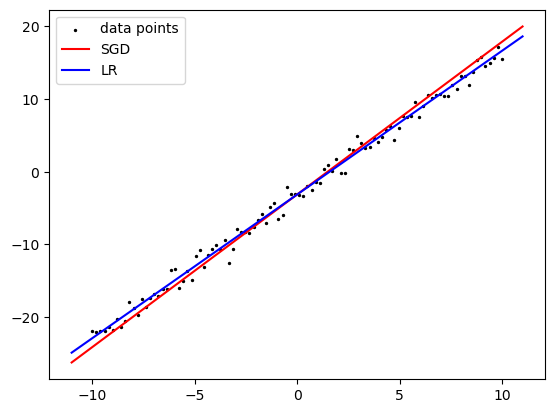

In [27]:
plt.scatter(x, y, color = 'k', s = 2, label = 'data points')

xx = np.linspace(-11, 11, 100)
yy_SGD = k_SGD[0]*xx + b_SGD
yy_LR = k_LR[0]*xx + b_LR

plt.plot(xx, yy_SGD, 'r-', label = 'SGD')
plt.plot(xx, yy_LR, 'b-', label = 'LR')

plt.legend()